In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #visualization library
from statsmodels.graphics.tsaplots import plot_acf #Auto-Correlation Plots
from statsmodels.graphics.tsaplots import plot_pacf #Partial-Auto Correlation Plots

In [2]:
export_data = pd.read_csv("2018-2010_export.csv")
import_data = pd.read_csv("2018-2010_import.csv")

In [3]:
export_data.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [5]:
export_data.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [6]:
import_data.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [7]:
import_data.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [8]:
import_new = import_data.dropna()#dropped all the NA entries
import_new = import_new.reset_index(drop=True)#reset the indices after the above step

In [9]:
export_new = export_data.dropna()
export_new = export_new.reset_index(drop=True)

In [11]:
import_new.isnull().sum()#validating is NAs have been dropped


HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [12]:
export_new.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [13]:
#Analysis

In [16]:
unique_importing_countries = import_new[['country']].nunique()
unique_exporting_countries = export_new[['country']].nunique()
print(unique_importing_countries)
print(unique_exporting_countries)

country    241
dtype: int64
country    248
dtype: int64


In [17]:
import_group = import_new.groupby(['country','year']).agg({'value':'sum'})
export_group = export_new.groupby(['country','year']).agg({'value':'sum'})

In [20]:
import_group #Checking the grouping

value
country         year         
AFGHANISTAN TIS 2010   146.01
                2011   132.49
                2012   159.53
                2013   208.76
                2014   261.92
                2015   615.80
                2016   292.90
                2017   867.54
                2018   870.88
ALBANIA         2010     0.11
                2011   141.13
                2012    31.05
                2013   198.79
                2014    50.77
                2015    34.36
                2016     6.50
                2017    77.70
                2018    45.24
ALGERIA         2010  1816.19
                2011  2111.43
                2012   683.54
                2013   860.89
                2014   551.81
                2015   598.86
                2016   605.11
                2017  2521.92
                2018  3393.88
AMERI SAMOA     2010     0.15
                2011     1.40
                2012     0.78
...                       ...
WALLIS F IS     2014     1.01
                2015     0.24
                2017     0.02
YEMEN REPUBLC   2010  1743.89
                2011   970.69
                2012   958.92
                2013   782.18
                2014   540.70
                2015     6.87
                2016     4.81
                2017   306.10
                2018    23.50
ZAMBIA          2010    32.08
                2011   168.83
                2012   324.85
                2013   243.15
                2014   283.34
                2015   475.36
                2016   743.90
                2017  2189.96
                2018  1021.00
ZIMBABWE        2010    11.62
                2011     2.88
                2012    34.54
                2013    12.51
                2014    32.69
                2015    24.44
                2016    60.45
                2017   124.40
                2018    15.62

[2001 rows x 1 columns]

In [22]:
export_group.groupby(['country'])
import_t = import_group.groupby(['country']).agg({'value':'sum'})
export_t = export_group.groupby(['country']).agg({'value':'sum'}).loc[import_t.index.values]

In [23]:
data_1=import_group.groupby(['country']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_2=export_t
d3 = data_2 - data_1

In [24]:
data_1.columns = ['import']
data_2.columns = ['export']
d3.columns = ['Loss/Profit']

In [25]:
df=pd.DataFrame(index=data_1.index.values)#df=pd.concat([data_1,data_2,data_3])
df['import']=data_1
df['export']=data_2
df['Loss/Profit']=d3

In [26]:
df

,import,export,Loss/Profit
AUSTRALIA,142723.67,25372.29,-117351.38
GERMANY,148120.79,68855.45,-79265.34
KOREA RP,154263.94,38023.02,-116240.92
INDONESIA,160452.65,42148.84,-118303.81
IRAQ,182464.57,9833.61,-172630.96
SWITZERLAND,243739.33,9992.56,-233746.77
U S A,281436.58,360609.57,79172.99
SAUDI ARAB,292104.09,65995.99,-226108.10
U ARAB EMTS,307810.15,289374.88,-18435.27
CHINA P RP,678877.15,121806.00,-557071.15


Text(0, 0.5, 'Value of transactions (in million US$)')

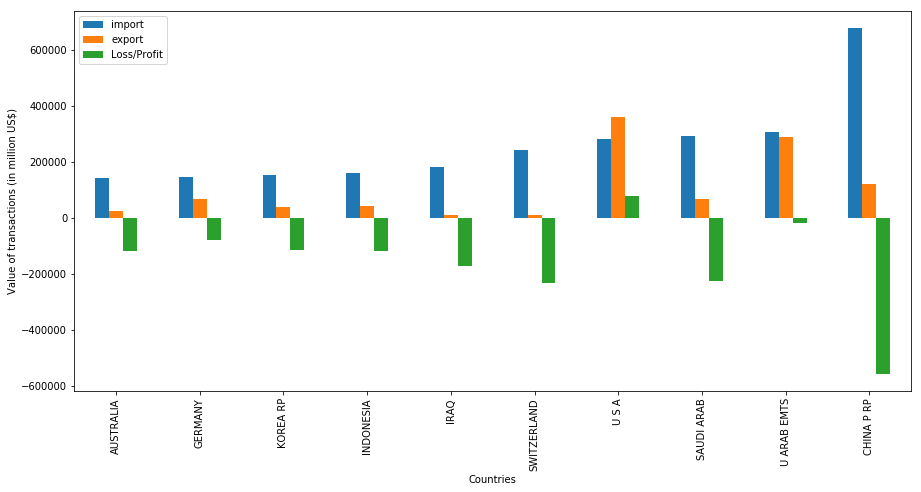

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='bar',ax=ax)
ax.set_xlabel('Countries')
ax.set_ylabel('Value of transactions (in million US$)')
#Below graph represents the comparison of import/export transactions for the top countries and also their respective profits or losses

In [32]:
#From above we understand that US is the only country where we make profit as the exports are more than imports
#In other countries our import is more, so we face deficits

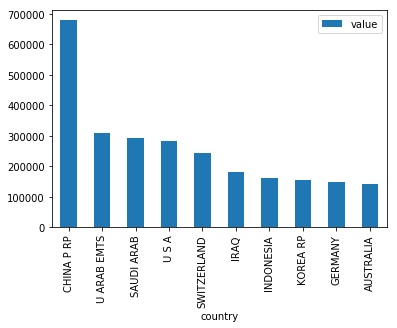

In [34]:
df_import = import_new.groupby('country').agg({'value':'sum'}).sort_values(by='value', ascending = False).head(10)
df_import.plot(kind='bar')

In [52]:
import_group1 = import_new.groupby(['year','Commodity']).agg({'value':'sum'})
export_group1 = export_new.groupby(['year','Commodity']).agg({'value':'sum'})

In [53]:
import_group1.head()


value
year Commodity                                                  
2010 AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.            3442.42
     ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLU...   226.20
     ALUMINIUM AND ARTICLES THEREOF.                     2221.85
     ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...  6594.09
     ARMS AND AMMUNITION; PARTS AND ACCESSORIES THER...     4.99

In [54]:
export_group1.head()

value
year Commodity                                                  
2010 AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.            1667.77
     ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLU...   240.78
     ALUMINIUM AND ARTICLES THEREOF.                     1243.26
     ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE...   745.10
     ARMS AND AMMUNITION; PARTS AND ACCESSORIES THER...    17.03

In [61]:
import_te = import_group1.groupby(['Commodity']).agg({'value':'sum'})
export_te = export_group1.groupby(['Commodity']).agg({'value':'sum'}).loc[import_te.index.values]

In [62]:
import_te


,value
Commodity,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",65212.62
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,4097.18
ALUMINIUM AND ARTICLES THEREOF.,42375.88
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,115462.40
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,414.10
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",2884.66
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",3991.15
ARTICLES OF IRON OR STEEL,45781.95
"ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.",3750.24


In [63]:
export_te

,value
Commodity,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",28219.85
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,2384.15
ALUMINIUM AND ARTICLES THEREOF.,25407.12
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,8774.07
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,656.08
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",62299.47
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",75122.06
ARTICLES OF IRON OR STEEL,61629.65
"ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.",20304.95


In [80]:
data_11=import_group1.groupby(['Commodity']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_22=export_te
d33 = data_22 - data_11

In [81]:
data_22


,export
Commodity,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",28219.85
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,2384.15
ALUMINIUM AND ARTICLES THEREOF.,25407.12
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,8774.07
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,656.08
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",62299.47
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",75122.06
ARTICLES OF IRON OR STEEL,61629.65
"ARTICLES OF LEATHER,SADDLERY AND HARNESS;TRAVEL GOODS, HANDBAGS AND SIMILAR CONT.ARTICLES OF ANIMAL GUT(OTHR THN SILK-WRM)GUT.",20304.95


In [82]:
data_11.columns = ['import']
data_22.columns = ['export']
d33.columns = ['Loss/Profit']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [69]:
df=pd.DataFrame(index=data_11.index.values)#df=pd.concat([data_1,data_2,data_3])
df['import']=data_11
df['export']=data_22
df['Loss/Profit']=d33

In [70]:
df

,import,export,Loss/Profit
FERTILISERS.,68717.35,820.76,-67896.59
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",84106.63,21283.46,-62823.17
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,115462.40,8774.07,-106688.33
IRON AND STEEL,126034.55,76597.96,-49436.59
PLASTIC AND ARTICLES THEREOF.,129127.42,50056.63,-79070.79
ORGANIC CHEMICALS,192168.00,113008.98,-79159.02
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",393021.90,123810.69,-269211.21
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",427570.66,89819.84,-337750.82
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",770826.15,383341.86,-387484.29
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1618556.68,434594.81,-1183961.87


Text(0, 0.5, 'Value of transactions (in million US$)')

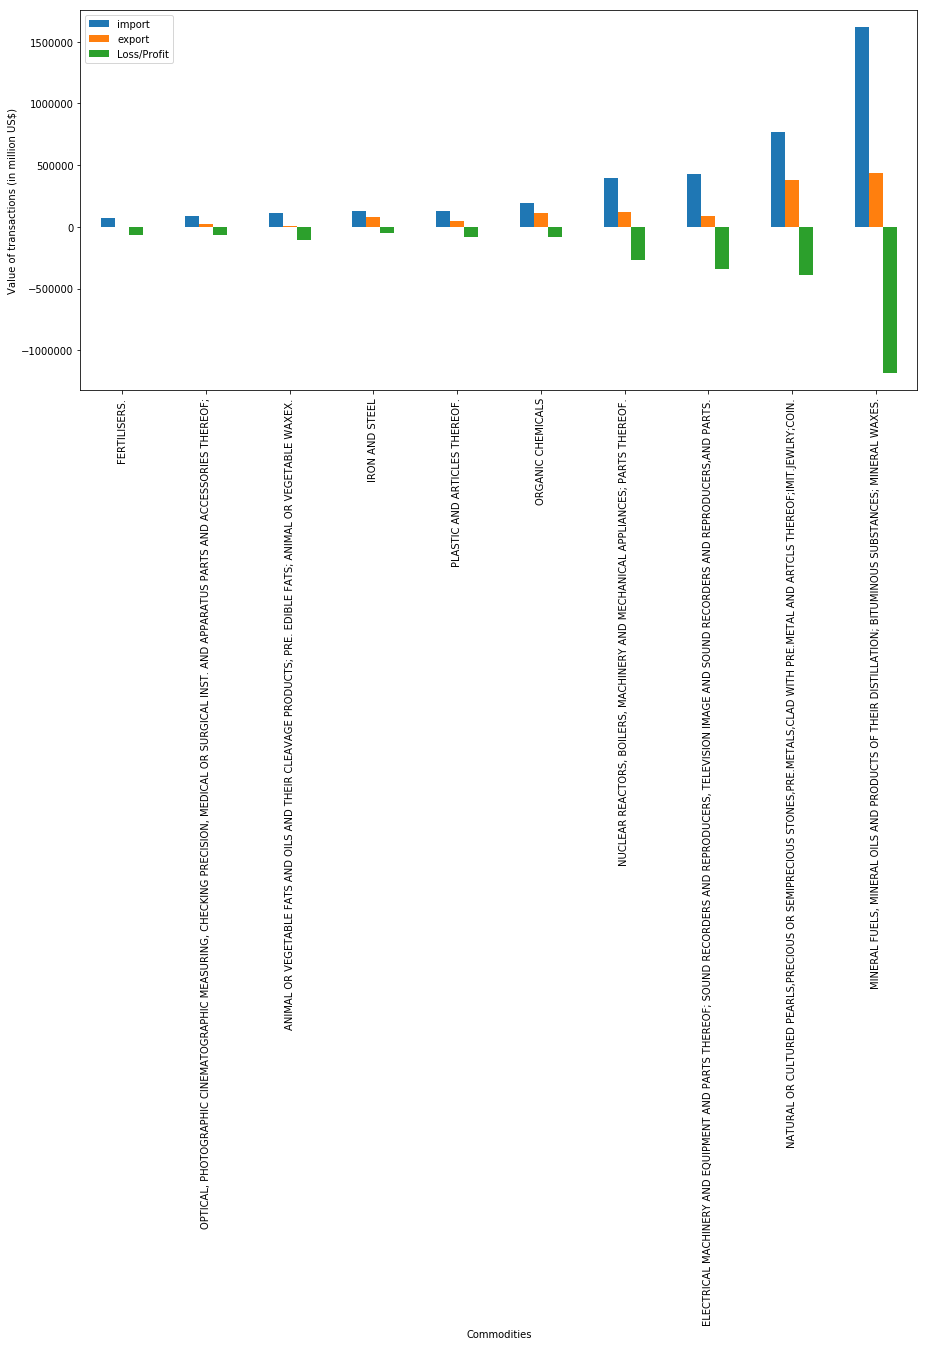

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='bar',ax=ax)
ax.set_xlabel('Commodities')
ax.set_ylabel('Value of transactions (in million US$)')